In [1]:
import numpy as np
import scipy.interpolate

import SimLight as sl
import SimLight.plottools as slpl

SimLight 0.0.3



In [2]:
# unit
m = 1
cm = 1e-2
mm = 1e-3
µm = 1e-6
nm = 1e-9

In [3]:
wavelength = 0.550 * µm
size = 5 * mm
N = 50  # pixel number
f = 10 * mm
z = 10 * mm

In [4]:
F = sl.PlaneWave(wavelength, size, N)
L = sl.Lens.new_lens(size, f)

In [5]:
F, F_3d = sl.near_field_propagation(F, L, z, return_3d_field=True, coord='spherical')

0.0074999997251639985
Interpolating (74 =&gt; 98): 150/150

In [6]:
np.save('F.npy', F)
np.save('F_3d.npy', F_3d)

15.0 0.0074999997251639985 2000.000073289603


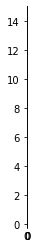

In [7]:
slpl.plot_vertical_intensity(F_3d, norm_type=1)

In [8]:
F = sl.near_field_propagation(F, L, z-15*µm, coord='spherical')
F.plot_intensity(dimension=2, norm_type=1)